#Qualidade do Ar
####Uso do Classificador Ingênuo de Bayes para determinar o grau de poluição atmosférica



##Bibliotecas
**Devemos, primeiro, importar as bibliotecas que iremos utilizar em nosso projeto:**

pandas -> para trabalhar com o banco de dados

numpy -> para manipular matrizes e vetores e realizar operações matemáticas

matplotlib -> para criar grpaficos e visualizar dados

sklearn -> biblioiteca de Machine Learning para utilizarmos o Classificador Ingênuo de Bayes 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  #Linkando o Colab com o Drive

import pandas as pd  #Manipular database
import matplotlib.pyplot as plt  #Visualização de dados
from sklearn.model_selection import train_test_split  #Divisor database
from sklearn.naive_bayes import GaussianNB  #Classificador 
from sklearn import metrics  #Acurácia dos resultados
import time
import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Database
**O banco de dados utilizado em nosso modelo se encontra em https://archive-beta.ics.uci.edu/ml/datasets/air+quality e foi adaptado para ter uma maior estabilidade e simplicitade durante o modelo e na exposição dos seus resultados.**

> Ele é composto das informações acerca da data e hora das medições (uma medição por hora durante um ano) onde foi registrada a concentração de CO (mg/m3), Hidrocarbonetos não metálicos (μg/m3), Benzeno (μg/m3), NOx (ppb), NO2 (μg/m3), os dados também abrangem a humidade relativa do ar (%) a humidade absoluta e a temperatura ambiente do local (°C). Posteriormente tais comparações foram classificadas em relação às concentrações naturais dos gases e, dessa forma, conseguimos definir se tal condição atmosférica está boa ou ruim.

> Os valores originais sinalizados no database como -200 (que significariam a falta de medição) foram sunstituídos pelos valores médios da concentração natural dos gases, de forma que não afetariam o modelo.

> Informações mais detalhadas acerca da base de dados estão disponíveis em nosso relatório e seminário.

Contudo, antes de mais nada, é necessario carregar os dados para o código. 

Como os valores já são apenas numéricos, não é necessário atribuir valores para as classes.

In [ ]:
database = pd.read_excel('/content/drive/MyDrive/AirQuality/DataAirQualityUCI.xlsx')


Após o carregamento e tratamento dos dados, resultamos com o segunte database:

In [ ]:
database.info()  #Visão geral das categorias
database.head(15)  #Primeirs 15 linhas formatadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Resultado  9357 non-null   int64         
 1   Date       9357 non-null   datetime64[ns]
 2   Time       9357 non-null   object        
 3   CO(GT)     9357 non-null   float64       
 4   NMHC(GT)   9357 non-null   int64         
 5   C6H6(GT)   9357 non-null   float64       
 6   NOx(GT)    9357 non-null   float64       
 7   NO2(GT)    9357 non-null   float64       
 8   T          9357 non-null   float64       
 9   RH         9357 non-null   float64       
 10  AH         9357 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 804.2+ KB


,Resultado,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,0,2004-03-10,18:00:00,2.6,150,11.881723,166.0,113.0,13.600,48.875001,0.757754
1,0,2004-03-10,19:00:00,2.0,112,9.397165,103.0,92.0,13.300,47.700000,0.725487
2,0,2004-03-10,20:00:00,2.2,88,8.997817,131.0,114.0,11.900,53.975000,0.750239
3,0,2004-03-10,21:00:00,2.2,80,9.228796,172.0,122.0,11.000,60.000000,0.786713
4,0,2004-03-10,22:00:00,1.6,51,6.518224,131.0,116.0,11.150,59.575001,0.788794
5,0,2004-03-10,23:00:00,1.2,38,4.741012,89.0,96.0,11.175,59.175000,0.784772
6,0,2004-03-11,00:00:00,1.2,31,3.624399,62.0,77.0,11.325,56.775000,0.760312
7,0,2004-03-11,01:00:00,1.0,31,3.326677,62.0,76.0,10.675,60.000000,0.770238
8,0,2004-03-11,02:00:00,0.9,24,2.339416,45.0,60.0,10.650,59.674999,0.764819
9,0,2004-03-11,03:00:00,0.6,19,1.696658,41.0,100.0,10.250,60.200001,0.751657


Agora, vamos ilustrar graficamente os atributos da base de dados, a fim de termos uma melhor compreensão do modelo.

> Os gráficos foram construídos dividindo a amplitude dos valores em 4 intervalos, de menores valores até os maiores (eixo x), e depois é apresentada a quiantidade de cada intervalo (eixo y).  

####CO(GT)

9357


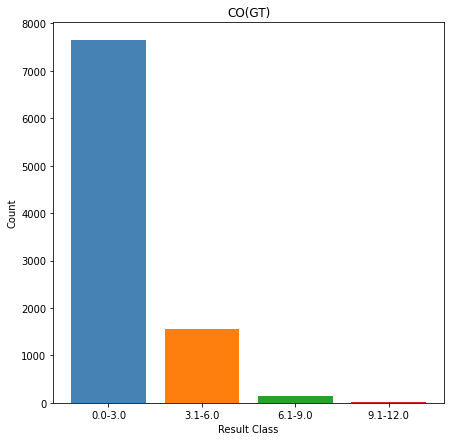

In [ ]:
colors = ['steelblue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lightcoral']
dataclass = []

qtd = [0, 0, 0, 0]
dataclass = list(database['CO(GT)'].values)  #Guarda em uma lista os valores da classe seleconada

plotclass = ['0.0-3.0', '3.1-6.0', '6.1-9.0', '9.1-12.0']
print(len(dataclass))
for x in dataclass:
  if x >= 0 and x<=3: 
    qtd[0]+=1;
  elif x > 3 and x<=6:
    qtd[1]+=1;
  elif x > 6 and x<=9:
    qtd[2]+=1;
  elif x > 9 and x<=12:
    qtd[3]+=1;

#Plotando o gráfico
plt.figure(figsize=(7, 7))
plt.bar(plotclass, qtd, color=colors)
plt.title('CO(GT)')
plt.xlabel("Result Class")
plt.ylabel("Count")
plt.show()

####NMHC(GT)

9357


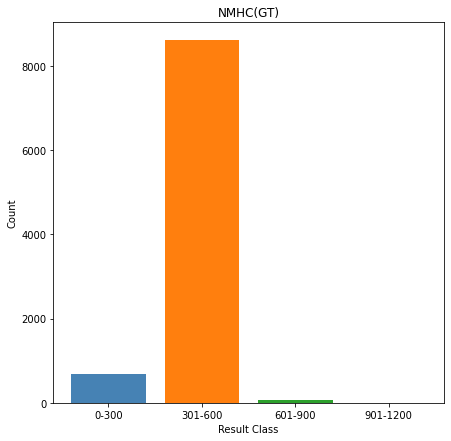

In [ ]:
qtd = [0, 0, 0, 0]
dataclass = list(database['NMHC(GT)'].values)  #Guarda em uma lista os valores da classe seleconada

plotclass = ['0-300', '301-600', '601-900', '901-1200']
print(len(dataclass))
for x in dataclass:
  if x >= 0 and x<=300: 
    qtd[0]+=1;
  elif x > 300 and x<=600:
    qtd[1]+=1;
  elif x > 600 and x<=900:
    qtd[2]+=1;
  elif x > 900 and x<=1200:
    qtd[3]+=1;

#Plotando o gráfico
plt.figure(figsize=(7, 7))
plt.bar(plotclass, qtd, color=colors)
plt.title('NMHC(GT)')
plt.xlabel("Result Class")
plt.ylabel("Count")
plt.show()

####C6H6(GT)

In [ ]:
qtd = [0, 0, 0, 0]
dataclass = list(database['C6H6(GT)'].values)  #Guarda em uma lista os valores da classe seleconada

plotclass = ['00.00-15.00', '15.01-30.00', '30.1-45.00', '45.01-60.00']
print(len(dataclass))
for x in dataclass:
  if x >= 0 and x<=15: 
    qtd[0]+=1;
  elif x > 15 and x<=30:
    qtd[1]+=1;
  elif x > 30 and x<=45:
    qtd[2]+=1;
  elif x > 45 and x<=60:
    qtd[3]+=1;

#Plotando o gráfico
plt.figure(figsize=(7, 7))
plt.bar(plotclass, qtd, color=colors)
plt.title('C6H6(GT)')
plt.xlabel("Result Class")
plt.ylabel("Count")
plt.show()

####NOx(GT)

9357


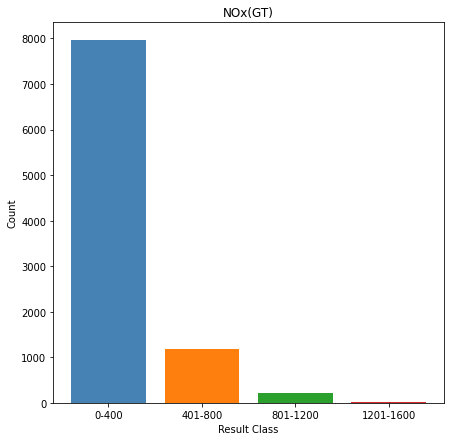

In [ ]:
qtd = [0, 0, 0, 0]
dataclass = list(database['NOx(GT)'].values)  #Guarda em uma lista os valores da classe seleconada

plotclass = ['0-400', '401-800', '801-1200', '1201-1600']
print(len(dataclass))
for x in dataclass:
  if x >= 0 and x<=400: 
    qtd[0]+=1;
  elif x > 400 and x<=800:
    qtd[1]+=1;
  elif x > 800 and x<=1200:
    qtd[2]+=1;
  elif x > 1200 and x<=1600:
    qtd[3]+=1;

#Plotando o gráfico
plt.figure(figsize=(7, 7))
plt.bar(plotclass, qtd, color=colors)
plt.title('NOx(GT)')
plt.xlabel("Result Class")
plt.ylabel("Count")
plt.show()

####NO2(GT)

9357


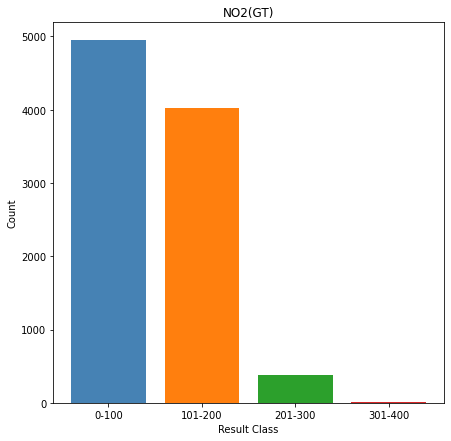

In [ ]:
qtd = [0, 0, 0, 0]
dataclass = list(database['NO2(GT)'].values)  #Guarda em uma lista os valores da classe seleconada
plotclass = ['0-100', '101-200', '201-300', '301-400']
print(len(dataclass))
for x in dataclass:
  if x >= 0 and x<=100: 
    qtd[0]+=1;
  elif x > 100 and x<=200:
    qtd[1]+=1;
  elif x > 200 and x<=300:
    qtd[2]+=1;
  elif x > 300 and x<=400:
    qtd[3]+=1;

#Plotando o gráfico
plt.figure(figsize=(7, 7))
plt.bar(plotclass, qtd, color=colors)
plt.title('NO2(GT)')
plt.xlabel("Result Class")
plt.ylabel("Count")
plt.show()

####T

9357


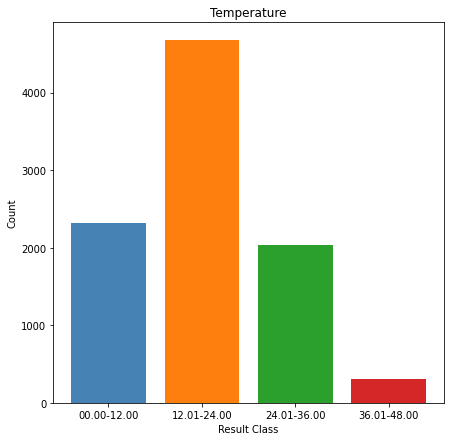

In [ ]:
qtd = [0, 0, 0, 0]
dataclass = list(database['T'].values)  #Guarda em uma lista os valores da classe seleconada

plotclass = ['00.00-12.00', '12.01-24.00', '24.01-36.00', '36.01-48.00']
print(len(dataclass))
for x in dataclass:
  if x >= 0 and x<=12: 
    qtd[0]+=1;
  elif x > 12 and x<=24:
    qtd[1]+=1;
  elif x > 24 and x<=36:
    qtd[2]+=1;
  elif x > 36 and x<=48:
    qtd[3]+=1;

#Plotando o gráfico
plt.figure(figsize=(7, 7))
plt.bar(plotclass, qtd, color=colors)
plt.title('Temperature')
plt.xlabel("Result Class")
plt.ylabel("Count")
plt.show()

####RH

9357


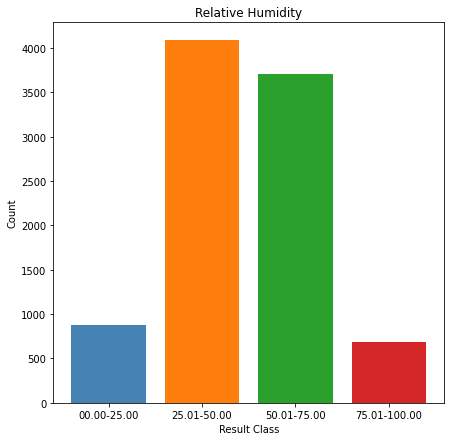

In [ ]:
qtd = [0, 0, 0, 0]
dataclass = list(database['RH'].values)  #Guarda em uma lista os valores da classe seleconada

plotclass = ['00.00-25.00', '25.01-50.00', '50.01-75.00', '75.01-100.00']
print(len(dataclass))
for x in dataclass:
  if x >= 0 and x<=25: 
    qtd[0]+=1;
  elif x > 25 and x<=50:
    qtd[1]+=1;
  elif x > 50 and x<=75:
    qtd[2]+=1;
  elif x > 75 and x<=100:
    qtd[3]+=1;

#Plotando o gráfico
plt.figure(figsize=(7, 7))
plt.bar(plotclass, qtd, color=colors)
plt.title('Relative Humidity')
plt.xlabel("Result Class")
plt.ylabel("Count")
plt.show()

####AH

9357


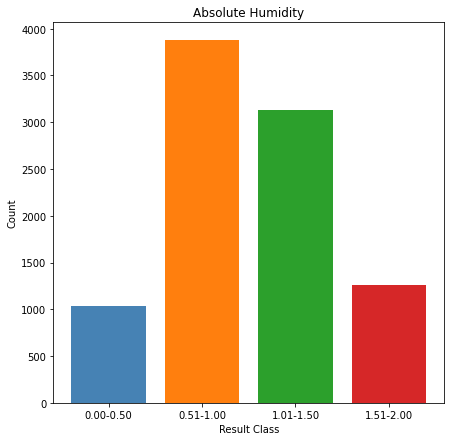

In [ ]:
qtd = [0, 0, 0, 0]
dataclass = list(database['AH'].values)  #Guarda em uma lista os valores da classe seleconada
plotclass = ['0.00-0.50', '0.51-1.00', '1.01-1.50', '1.51-2.00']
print(len(dataclass))
for x in dataclass:
  if x >= 0 and x<=0.5: 
    qtd[0]+=1;
  elif x > 0.5 and x<=1:
    qtd[1]+=1;
  elif x > 1 and x<=1.5:
    qtd[2]+=1;
  elif x > 1.5 and x<=2:
    qtd[3]+=1;

#Plotando o gráfico
plt.figure(figsize=(7, 7))
plt.bar(plotclass, qtd, color=colors)
plt.title('Absolute Humidity')
plt.xlabel("Result Class")
plt.ylabel("Count")
plt.show()

##Classificador Ingenuo de Bayes
Agora, após o trabalho e análise da base de dados, vamos implementar o modelo. Conhecido como Classificador Naive Bayes, ele é utilizado em machine learning e se baseia no Teorema de Bayes,

> P(Bi|A) = P(A|Bi) P(Bi) / Σ P(A|Bj) P(Bj)

Que classifica a probabilidade da ocorrência de um evento Bi dado que um evento A tenha ocorrido. Podemos utilizar essa propriedade para classificar um novo evento (como as características do ar de algum lugar) comparando-as com padrões já vistos nos casos de treinamento.

> Foi utilizado 70% do database para o treinamento do modelo e 30% para o teste.

In [ ]:
x = database.iloc[:, 3:]  #Atributos (menos a hora e data de verificação)
y = database.iloc[:, 0]  #Resultados 
#print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = int(time.time()))

model = GaussianNB()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

#Verificando o desemplenho do modelo
accu = metrics.accuracy_score(y_test, y_predicted)  #Accuracy
prec = metrics.precision_score(y_test,y_predicted, average="weighted", zero_division=0)  #Precision
recall = metrics.precision_score(y_test, y_predicted, average="weighted", zero_division=0)  #Recall
f1_score = metrics.f1_score(y_test, y_predicted, average="weighted")  #F1 Score
print('Desempenho do modelo:\n\tAccuracy: ', accu, '\n\tPrecision:', prec, '\n\tRecall:   ', recall, '\n\tF1_score: ', f1_score, '\n')

Desempenho do modelo:
	Accuracy:  0.9615384615384616 
	Precision: 0.962583748155863 
	Recall:    0.962583748155863 
	F1_score:  0.9618290847670267 



Verificamos que todos os parâmetros estão em aproximadamente 96%, o que oferece uma boa precisão a respeito das condições atmosféricas de uma amostra de ar. Vamos agora testar o modelo duas vezes para valores de entrada fornecidos por um usuário.

In [ ]:
#Testando para uma amostra considerada limpa [co = 0.9, nmhc = 61, c6h6 = 2.5, nox = 56, no2 = 62, t = 11.5, rh = 60, ah = 0.65]
co = float(input("Digite a concentração de CO (mg/m^3): "))
nmhc = int(input("Digite a concentração de NMHC (microg/m^3): "))
c6h6 = float(input("Digite a concentração de C6H6 (microg/m^3): "))
nox = float(input("Digite a concentração de NOX (ppb): "))
no2 = float(input("Digite a concentração de NO2 (mg/m^3): "))
t = float(input("Digite a temperatura (ºC): "))
rh = float(input("Digite a humidade relativa (%): "))
ah = float(input("Digite a humidade absoluta: "))

res = model.predict([[co, nmhc, c6h6, nox, no2, t, rh, ah]])
if res==1: print('\nSua amostra de ar é considerada poluída\n')
if res==0: print('\nSua amostra de ar é considerada limpa\n')


#Testando para uma amostra considerada poluída [co = 6.9, nmhc = 401, c6h6 = 22.1, nox = 250, no2 = 140, t = 9.7, rh = 50.8, ah = 0.5]
co = float(input("Digite a concentração de CO (mg/m^3): "))
nmhc = int(input("Digite a concentração de NMHC (microg/m^3): "))
c6h6 = float(input("Digite a concentração de C6H6 (microg/m^3): "))
nox = float(input("Digite a concentração de NOX (ppb): "))
no2 = float(input("Digite a concentração de NO2 (mg/m^3): "))
t = float(input("Digite a temperatura (ºC): "))
rh = float(input("Digite a humidade relativa (%): "))
ah = float(input("Digite a humidade absoluta: "))

res = model.predict([[co, nmhc, c6h6, nox, no2, t, rh, ah]])
if res==1: print('\nSua amostra de ar é considerada poluída\n')
if res==0: print('\nSua amostra de ar é considerada limpa\n')

Digite a concentração de CO (mg/m^3): 0.9
Digite a concentração de NMHC (microg/m^3): 61
Digite a concentração de C6H6 (microg/m^3): 2.5
Digite a concentração de NOX (ppb): 56
Digite a concentração de NO2 (mg/m^3): 62
Digite a temperatura (ºC): 11.5
Digite a humidade relativa (%): 60
Digite a humidade absoluta: 0.65


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"



Sua amostra de ar é considerada limpa

Digite a concentração de CO (mg/m^3): 6.9
Digite a concentração de NMHC (microg/m^3): 401
Digite a concentração de C6H6 (microg/m^3): 22.1
Digite a concentração de NOX (ppb): 250
Digite a concentração de NO2 (mg/m^3): 140
Digite a temperatura (ºC): 9.7
Digite a humidade relativa (%): 50.8
Digite a humidade absoluta: 0.5

Sua amostra de ar é considerada poluída



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


##Referências

P. L. MEYER. **Probabilidade - Aplicações à estatística**. 2ª ed. Washington.

Vito, Saverio. (2016). **Air Quality**. UCI Machine Learning Repository.

Min. do Meio Ambiente. **Qualidade do Ar**. Disponível em: https://antigo.mma.gov.br/cidades-sustentaveis/qualidade-do-ar.html.

P. C. T. Gomes. **Classificação com Naive Bayes**. Disponível em: https://www.datageeks.com.br/naive-bayes/. 

ECYCLE. **Entenda o que é monóxido de carbono**. Disponível em: https://www.ecycle.com.br/monoxido-de-carbono/.

SCIENCE DIRECT. **Air Pollutant**. Disponível em: https://www.sciencedirect.com/topics/earth-and-planetary-sciences/air-pollutant.

GUO, Songjun. YANG, Fumo. TAN, Jihua. DUAN, Jingchun. **Nonmethane Hydrocarbons in Ambient Air of Hazy and Normnal Days in Foshan, South China**. Disponível em: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3313607/.

TEESING. **PPM TO M/MG3 CONVERTER FOR GASES**. Disponível em: https://www.teesing.com/en/page/library/tools/ppm-mg3-converter
